# Usability test of the PhD Portal Data Visualizations

<h3>Importation of the required libraries and reading of the CSV file that contains all the questionnaire responses</h3>

In [1]:
import pandas as pd
import numpy as np
from termcolor import colored
from scipy import stats
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 1000

df_clean = pd.read_csv('results-survey463969.csv', sep=';')

In [2]:
df_clean

,ID de respuesta,Edad,País en el que has nacido,Género,¿Cuál es tu perfil en el portal de doctorado?,Curso en el que te matriculaste en el doctorado,¿Con qué frecuencia utilizas el portal del Programa de Doctorado Formación en la Sociedad del Conocimiento (https://knowledgesociety.usal.es)?,¿Has tenido o tienes estudiantes de doctorado en el Programa Formación en la Sociedad del Conocimiento?,"Antes de responder las siguientes preguntas, sigue estas instrucciones \tAccede al portal de doctorado con tu cuenta de usuario: https://knowledgesociety.usal.es/user \tEntra en tu perfil, te aparecerá la opción ""Estadísticas"" como muestra la siguiente imagen.Debes entrar en esa opción y ver la información que proporciona. \tAccede al perfil de uno de tus estudiantes de doctorado. Verás la opción ""Línea Tiempo"" como en esta imagen.Debes entrar en esa opción y ver la información que proporciona. \tTambién podrás ver una gráfica bajo el título ""Progreso"" en el perfil de tu estudiante de doctorado. La gráfica será similar a la que se muestra en esta imagen:","Antes de responder las siguientes preguntas, sigue estas instrucciones \tAccede al portal de doctorado con tu cuenta de usuario: https://knowledgesociety.usal.es/user \tEntra en tu perfil, verás la opción ""Línea Tiempo"" como en esta imagen.Debes entrar en esa opción y ver la información que proporciona. \tTambién podrás ver una gráfica bajo el título ""Progreso"", justo encima de tus publicaciones. La gráfica será similar a la que se muestra en esta imagen:","Indica tu grado de acuerdo o desacuerdo con cada una de las siguientes afirmaciones. Los posibles valores de respuesta son: 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo). [Me gustaría usar esta herramienta frecuentemente]","Indica tu grado de acuerdo o desacuerdo con cada una de las siguientes afirmaciones. Los posibles valores de respuesta son: 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo). [Considero que esta herramienta es innecesariamente compleja]","Indica tu grado de acuerdo o desacuerdo con cada una de las siguientes afirmaciones. Los posibles valores de respuesta son: 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo). [Considero que la herramienta es fácil de usar]","Indica tu grado de acuerdo o desacuerdo con cada una de las siguientes afirmaciones. Los posibles valores de respuesta son: 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo). [Considero necesario el apoyo de personal experto para poder utilizar esta herramienta]","Indica tu grado de acuerdo o desacuerdo con cada una de las siguientes afirmaciones. Los posibles valores de respuesta son: 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo). [Considero que las funciones de la herramienta están bien integradas]","Indica tu grado de acuerdo o desacuerdo con cada una de las siguientes afirmaciones. Los posibles valores de respuesta son: 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo). [Considero que la herramienta presenta muchas contradicciones]","Indica tu grado de acuerdo o desacuerdo con cada una de las siguientes afirmaciones. Los posibles valores de respuesta son: 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo). [Imagino que la mayoría de las personas aprenderían a usar esta herramienta rápidamente]","Indica tu grado de acuerdo o desacuerdo con cada una de las siguientes afirmaciones. Los posibles valores de respuesta son: 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo). [Considero que el uso

<h3>Cleaning the dataset</h3>
<ul>
<li>1) Rename the columns to reduce verbosity in column names</li>
<li>2) Substract the valuable columns for the analysis (discarding all the questionnaire metadata)</li>
</ul>

In [3]:
df_clean.columns = ['ID', 'Age_Range', 'Birthplace', 'Gender', 'Role', 'Enrollment', 'Usage_Frequency', 'Advised_Students', 'Description_1', 'Description_2', 'SUS_1', 'SUS_2', 'SUS_3', 'SUS_4', 'SUS_5', 'SUS_6', 'SUS_7', 'SUS_8','SUS_9', 'SUS_10', 'Positive_Comments', 'Negative_Comments']
df_clean = df_clean[['ID', 'Age_Range', 'Birthplace', 'Gender', 'Role', 'Enrollment', 'Usage_Frequency', 'Advised_Students', 'SUS_1', 'SUS_2', 'SUS_3', 'SUS_4', 'SUS_5', 'SUS_6', 'SUS_7', 'SUS_8','SUS_9', 'SUS_10', 'Positive_Comments', 'Negative_Comments']]

In [4]:
df_clean

,ID,Age_Range,Birthplace,Gender,Role,Enrollment,Usage_Frequency,Advised_Students,SUS_1,SUS_2,SUS_3,SUS_4,SUS_5,SUS_6,SUS_7,SUS_8,SUS_9,SUS_10,Positive_Comments,Negative_Comments
0,2,35 a 44 años,Rusia,Femenino,Estudiante de doctorado,2019-2020,Diariamente,NaN,5,2,5,3,5,1,4,1,5,1,visualización de resultados de aprendizaje,no hay tal cosa
1,3,55 a 64 años,España,Masculino,"Director/a de tesis (miembro del claustro, colaborador)",NaN,Mensualmente,Sí,3,2,4,1,4,1,4,1,3,1,La facilidad de uso,NaN
2,4,25 a 34 años,España,Masculino,Estudiante de doctorado,2018-2019,Mensualmente,NaN,3,2,3,2,3,2,3,2,3,3,NaN,NaN
3,5,45 a 54 años,España,Masculino,"Director/a de tesis (miembro del claustro, colaborador)",NaN,Mensualmente,Sí,4,2,3,2,3,2,3,2,3,2,NaN,NaN
4,6,35 a 44 años,España,Masculino,"Director/a de tesis (miembro del claustro, colaborador)",NaN,Mensualmente,Sí,4,2,4,1,4,1,5,2,4,1,Lo visual y representativo de la herramienta.,"Quizá es algo complejo su manejo.\nAdemás, al cargar el zoom sale muy alto y cuesta establecer una visión global que considero que es una de las finalidades de la herramienta."
5,9,45 a 54 años,Ecuador,Femenino,Estudiante de doctorado,2017-2018,Mensualmente,NaN,3,1,1,3,3,4,4,4,2,2,No se visualiza la información que describen.,"No es funcional, si el RAPI aloja las evidencias del avance"
6,11,35 a 44 años,Honduras,Femenino,Estudiante de doctorado,2020-2021,Semanalmente,NaN,4,1,5,1,5,1,5,1,5,1,Su versatilidad y fácil acceso,NaN
7,13,55 a 64 años,España,Femenino,"Director/a de tesis (miembro del claustro, colaborador)",NaN,Mensualmente,Sí,4,2,5,2,4,2,4,1,1,2,La línea del tiempo,Nada en concreto
8,14,45 a 54 años,Colombia,Masculino,Estudiante de doctorado,2020-2021,Diariamente,NaN,5,1,5,2,4,3,5,2,5,1,Permite tener un punto de referencia de las actividades en las cuales se ha avanzado.,NaN
9,15,45 a 54 años,México,Femenino,"Director/a de tesis (miembro del claustro, colaborador)",NaN,Semanalmente,Sí,5,1,5,1,5,1,5,1,4,1,"Me encanta la manera en que avanza este portal con funcionalidades que son de valor para el programa, felicidades!!!","Ninguna, solo si hubiera alguna forma de alertar sobre el estudiante, estaría bien, me imagino los colores de semáforo, verde, amarillo, rojo, de acuerdo con los avances, el tipo (tiempo parcial o completo) y lo que lleva cada estudiante. Muchas felicidades por este logro y gracias!!!! :o)"


<h3>SUS Score calculation for each participant</h3>
<br>
"To calculate the SUS score, first sum the score contributions from each item. Each item's
score contribution will range from 0 to 4. <br>For items 1,3,5,7,and 9 the score contribution is the
scale position minus 1. <br>For items 2,4,6,8 and 10, the contribution is 5 minus the scale position.
<br>Multiply the sum of the scores by 2.5 to obtain the overall value of SU.
SUS scores have a range of 0 to 100." 
<br><br>[Brooke, J. (1996). SUS-A quick and dirty usability scale. Usability evaluation in industry, 189(194), 4-7]

In [5]:
df_clean[['SUS_1', 'SUS_3', 'SUS_5', 'SUS_7', 'SUS_9']] -= 1 
df_clean[['SUS_2', 'SUS_4', 'SUS_6', 'SUS_8', 'SUS_10']] = 5 - df_clean[['SUS_2', 'SUS_4', 'SUS_6', 'SUS_8', 'SUS_10']].copy()

df_clean['SUS_TOTAL'] = 2.5 * (df_clean['SUS_1'] + df_clean['SUS_2'] + df_clean['SUS_3'] + df_clean['SUS_4'] + df_clean['SUS_5'] + df_clean['SUS_6'] + df_clean['SUS_7'] + df_clean['SUS_8'] + df_clean['SUS_9'] + df_clean['SUS_10'])

/Users/andreavazquez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-5-d0a488dc7134>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['SUS_TOTAL'] = 2.5 * (df_clean['SUS_1'] + df_clean['SUS_2'] + df_clean['SUS_3'] + df_clean['SUS_4'] + df_clean['SUS_5'] + df_clean['SUS_6'] + df_clean['SUS_7'] + df_clean['SUS_8'] + df_clean['SUS_9'] + df_clean['SUS_10'])


<h3>SUS Score mean</h3>
<br>
According to the literature, this value (65.23) falls close to the 50th percentile (which means that the system has an acceptable level of usability) as the average score of SUS is 68.00 
<br>[Sauro, J. (2011). A practical guide to the System Usability Scale: Background, benchmarks & best practices. Denver, CO: Measuring Usability LLC].

<br>
On the other hand, the value obtained also falls between the "OK" and "Good" ranges of the categorical scale made by Bangor. 
<br>[Bangor, A., Kortum, P., & Miller, J. (2009). Determining What Individual SUS Scores Mean: Adding an Adjective Rating Scale. Journal of Usability Studies, 4(3), 114-123]

In [6]:
sus_total = df_clean['SUS_TOTAL'].mean()
print(sus_total)

75.35714285714286


<h3>Learnability and Usability</h3>
<br>
Although the SUS was originally developed to provide a single score to indicate the (perceived) usability of a system [Brooke, J. (2013). SUS: a retrospective. Journal of usability studies, 8(2), 29-40.], subsequent studies pointed out the two-dimensional nature of this scale [Lewis, J. R., & Sauro, J. (2009, July). The factor structure of the system usability scale. In International conference on human centered design (pp. 94-103). Springer, Berlin, Heidelberg.].
<br><br>
Learnability can be calculated through items 4 and 10 (following the same scoring method as the original SUS score) but instead of multiplying it by 2.5 (to obtain a 0-100 scale from a 0-40 scale), we need to multiply the results by 12.5 (to obtain a 0-100 scale from a 0-8 scale).
<br><br>
In the same way, we can calculate usability with the remaining items, multiplying them by 3.125 to (to obtain a 0-100 scale from a 0-32 scale).

In [7]:
df_clean['Learnability'] = 12.5 * (df_clean['SUS_4'] + df_clean['SUS_10'])
df_clean['Usability'] = 3.125 * (df_clean['SUS_1'] + df_clean['SUS_2'] + df_clean['SUS_3'] + df_clean['SUS_5'] + df_clean['SUS_6'] + df_clean['SUS_7'] + df_clean['SUS_8'] + df_clean['SUS_9'])

The previous interpretation is applicable. As the results show, learnability (66.28) is more close to the SUS average than usability (64.97), but both values are close to the 50th percentile and can be considered acceptable.

In [8]:
learnability = df_clean['Learnability'].mean()
print(learnability)

74.28571428571429


In [9]:
usability = df_clean['Usability'].mean()
print(usability)

75.625


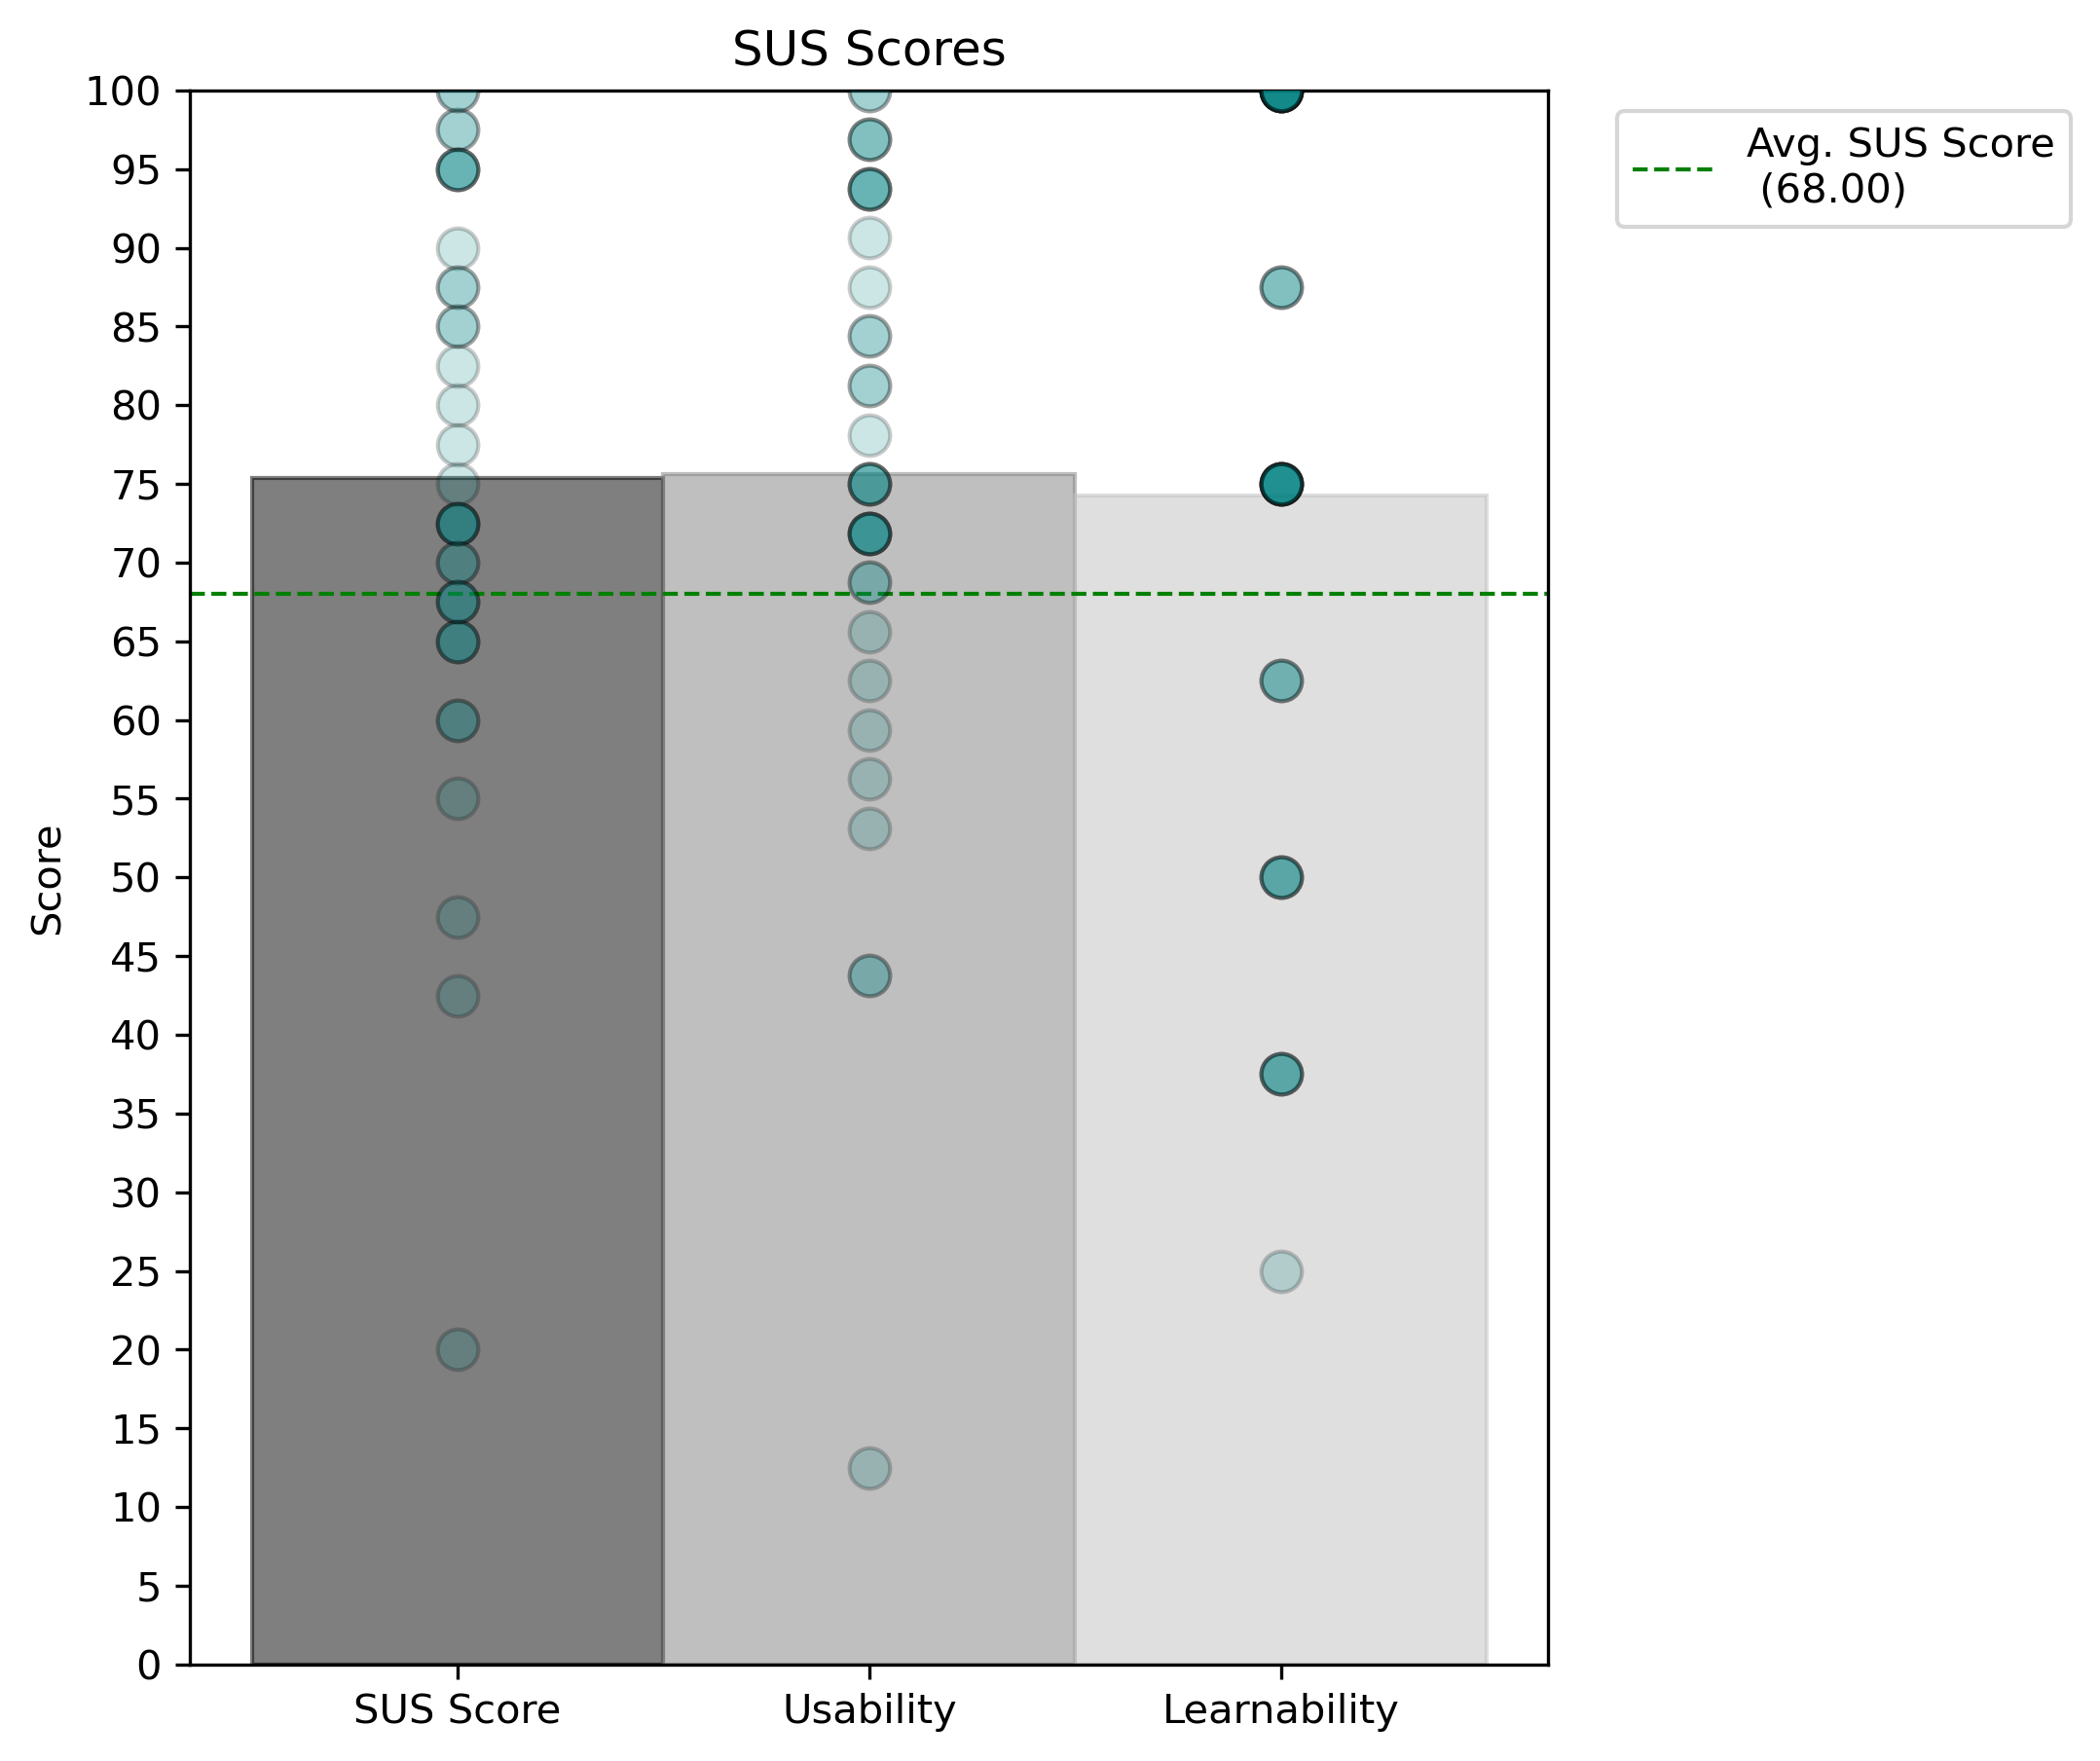

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(6, 7), dpi=300, facecolor='w', edgecolor='k')
 
x = ('SUS Score', 'Usability', 'Learnability')
y_pos = [3,3.5,4] 
score = [sus_total,usability,learnability]

barlist = plt.bar(y_pos, score, align='center', alpha=0.5, width=[0.5, 0.5, 0.5])
barlist[0].set_color('black')
barlist[1].set_color('grey')
barlist[2].set_color('silver')

plt.xticks(y_pos, x)
plt.ylim([0, 100])
plt.ylabel('Score')
plt.yticks(np.arange(0, 101, 5.0))
plt.axhline(68, color='g', linestyle='dashed', linewidth=1, label="Avg. SUS Score\n (68.00)")
plt.legend(bbox_to_anchor=(1.4, 1.0))

plt.scatter([3] * df_clean['SUS_TOTAL'].shape[0], df_clean['SUS_TOTAL'], s=100, color='teal', linewidth=1, edgecolor='black', alpha=0.2, zorder=3)
plt.scatter([3.5] * df_clean['Usability'].shape[0], df_clean['Usability'], s=100, color='teal', linewidth=1, edgecolor='black', alpha=0.2, zorder=3)
plt.scatter([4] * df_clean['Learnability'].shape[0], df_clean['Learnability'], s=100, color='teal', linewidth=1, edgecolor='black', alpha=0.2, zorder=3)

plt.title('SUS Scores')
 
plt.show()

<h3>Comments</h3>

As it has been said before, the negative comments pointed out the technical error and other issues like the language of the platform ('it should be operative in all languages' and 'if you choose one language the platform should be completely in that language') and the initial questionnaire to access the system ('unnecessary/awkward questions'). 
<br>
In addition, some users pointed out that the platform is difficult to use at the beggining, but then it becomes more easy and intuitive.
<br><br>
In the majority of comments, participants perceive it as a simple, helpful and useful platform.

In [11]:
def print_comments_score(x):
    global all_comments
    if x.Positive_Comments is not np.nan or x.Negative_Comments is not np.nan:
        if x.SUS_TOTAL >= 68:
            color = 'green'
        else:
            color = 'red'
        
        print(colored(str(x.SUS_TOTAL) + ": \n", color))
        print(colored(str(x.Positive_Comments), 'green'))
        print("\n")
        print(colored(str(x.Negative_Comments), 'red'))
        print("\n")

        
df_clean.apply(print_comments_score, axis=1)
print()

90.0: 

visualización de resultados de aprendizaje


no hay tal cosa


80.0: 

La facilidad de uso


nan


85.0: 

Lo visual y representativo de la herramienta.


Quizá es algo complejo su manejo.
Además, al cargar el zoom sale muy alto y cuesta establecer una visión global que considero que es una de las finalidades de la herramienta.


47.5: 

No se visualiza la información que describen.


No es funcional, si el RAPI aloja las evidencias del avance


97.5: 

Su versatilidad y fácil acceso


nan


72.5: 

La línea del tiempo


Nada en concreto


87.5: 

Permite tener un punto de referencia de las actividades en las cuales se ha avanzado.


nan


97.5: 

Me encanta la manera en que avanza este portal con funcionalidades que son de valor para el programa, felicidades!!!


Ninguna, solo si hubiera alguna forma de alertar sobre el estudiante, estaría bien, me imagino los colores de semáforo, verde, amarillo, rojo, de acuerdo con los avances, el tipo (tiempo parcial o completo) y lo que l